# 数据挖掘的五大流程  


1. 获取数据
2. **数据预处理**
数据预处理是从数据中检测，纠正或删除损坏，不准确或不适用于模型的记录的过程
可能面对的问题有：数据类型不同，比如有的是文字，有的是数字，有的含时间序列，有的连续，有的间断。
也可能，数据的质量不行，有噪声，有异常，有缺失，数据出错，量纲不一，有重复，数据是偏态，数据量太
大或太小
数据预处理的目的：让数据适应模型，匹配模型的需求
3. **特征工程**：
特征工程是将原始数据转换为更能代表预测模型的潜在问题的特征的过程，可以通过挑选最相关的特征，提取
特征以及创造特征来实现。其中创造特征又经常以降维算法的方式实现。
可能面对的问题有：特征之间有相关性，特征和标签无关，特征太多或太小，或者干脆就无法表现出应有的数
据现象或无法展示数据的真实面貌
特征工程的目的：1) 降低计算成本，2) 提升模型上限
4. 建模，测试模型并预测出结果
5. 上线，验证模型效果

## sklearn中的数据预处理与特征工程模块

+ 模块preprocessing：几乎包含数据预处理的所有内容
+ 模块Impute：填补缺失值专用
+ 模块feature_selection：包含特征选择的各种方法的实践
+ 模块decomposition：包含降维算法

# 数据预处理 Precessing &Impute

## 数据无量纲化(去单位化)

在机器学习算法实践中，我们往往有着将不同规格的数据转换到同一规格，或不同分布的数据转换到某个特定分布
的需求，这种需求统称为将数据“无量纲化”。

譬如梯度和矩阵为核心的算法中，譬如逻辑回归，支持向量机，神经
网络，无量纲化可以加快求解速度；而在距离类模型，譬如K近邻，K-Means聚类中，无量纲化可以帮我们提升模
型精度，避免某一个取值范围特别大的特征对距离计算造成影响。（一个特例是决策树和树的集成算法们，对决策
树我们不需要无量纲化，决策树可以把任意数据都处理得很好。）

数据的无量纲化可以是线性的，也可以是非线性的。线性的无量纲化包括**中心化**（Zero-centered或者Mean-subtraction）处理和**缩放处理**（Scale）。**中心化的本质是让所有记录减去一个固定值，即让数据样本数据平移到
某个位置**。**缩放的本质是通过除以一个固定值，将数据固定在某个范围之中**，取对数也算是一种缩放处理。

#### preprocessing.MinMaxScaler

当数据(x)按照**最小值**中心化后，再按**极差（最大值 - 最小值）缩放**，数据移动了最小值个单位，并且会被收敛到
[0,1]之间，而这个过程，就叫做数据**归一化**(Normalization，又称Min-Max Scaling)。注意，Normalization是归
一化，不是正则化，真正的正则化是regularization，不是数据预处理的一种手段。归一化之后的数据服从正态分
布，公式如下:

##### 归一化

>归一化：１）把数据变成(０，１)之间的小数。主要是为了数据处理方便提出来的，把数据映射到0～1范围之内处理，更加便捷快速。２）把有量纲表达式变成无量纲表达式，便于不同单位或量级的指标能够进行比较和加权。归一化是一种简化计算的方式，即将有量纲的表达式，经过变换，化为无量纲的表达式，成为纯量。

归一化:  
+ Max-min-normalization  
$$\dfrac{x - x_{min}}{x_{max} - x_{min}}$$  
+ 均值归一化  
$$\dfrac{x - \mu}{x_{max} - x_{min}}$$  


缺点：当有新数据加入时，可能导致max和min的变化，需要重新定义。

+ 非线性归一化
    + 对数函数转换：y = log10(x)
    + 反余切函数转换：y = atan(x) * 2 / π

经常用在数据分化比较大的场景，有些数值很大，有些很小。通过一些数学函数，将原始值进行映射。该方法包括 log、指数，正切等。需要根据数据分布的情况，决定非线性函数的曲线，比如log(V, 2)还是log(V, 10)等。


##### 标准化

>标准化：在机器学习中，我们可能要处理不同种类的资料，例如，音讯和图片上的像素值，这些资料可能是高维度的，资料标准化后会使每个特征中的数值平均变为0(将每个特征的值都减掉原始资料中该特征的平均)、标准差变为1，这个方法被广泛的使用在许多机器学习算法中(例如：支持向量机、逻辑回归和类神经网络)。

标准化：  
$$\dfrac{x - \mu}{\sigma} \;\;\;(其中，\mu为x的平均值,\sigma为x的标准差)$$

>中心化：平均值为0，对标准差无要求

##### 中心化
中心化：  
$$x - \mu$$

#### 为什么要归一化/标准化？

归一化/标准化实质是一种线性变换，线性变换有很多良好的性质，这些性质决定了对数据改变后不会造成“失效”，反而能提高数据的表现，这些性质是归一化/标准化的前提。比如有一个很重要的性质：线性变换不会改变原始数据的数值排序。  
1. 某些模型求解需要  

    + 在使用梯度下降的方法求解最优化问题时， 归一化/标准化后可以加快梯度下降的求解速度，即提升模型的收敛速度。如左图所示，未归一化/标准化时形成的等高线偏椭圆，迭代时很有可能走“之”字型路线（垂直长轴），从而导致迭代。  很多次才能收敛。而如右图对两个特征进行了归一化，对应的等高线就会变圆，在梯度下降进行求解时能较快的收敛。

![](images/3_1.png)  

+ 一些分类器需要计算样本之间的距离(如欧氏距离)，例如KNN。如果一个特征值域范围非常大，那么距离计算就主要取决于这个特征，从而与实际情况相悖(比如这时实际情况是值域范围小的特征更重要)。

## 归一化sklearn实现

In [31]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np 
import pandas as pd

In [32]:
data = np.array([[-1, 2], [-0.5, 6], [0, 10], [1, 18]])

In [33]:
pd.DataFrame(data)

,0,1
0,-1.0,2.0
1,-0.5,6.0
2,0.0,10.0
3,1.0,18.0


### 在归一化到0-1范围

In [34]:
# 实现归一化
scaler = MinMaxScaler()
scaler = scaler.fit(data)

In [36]:
scaler.transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [38]:
# 一步到位
result = MinMaxScaler().fit_transform(data)
result

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [40]:
# 实现复原效果
scaler = MinMaxScaler().fit(data)
result = scaler.transform(data)
result

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [42]:
scaler.inverse_transform(result)

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

### 归一化到指定范围


In [46]:
scaler = MinMaxScaler(feature_range=(5, 10)).fit(data)

In [51]:
scaler.transform(data)

array([[ 5.  ,  5.  ],
       [ 6.25,  6.25],
       [ 7.5 ,  7.5 ],
       [10.  , 10.  ]])

### 使用numpy实现归一化  


In [54]:
data_norm = (data - data.min(axis=0))  / (data.max(axis=0) - data.min(axis=0))

In [56]:
data_norm

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [61]:
# 反归一化
data_norm * (data.max(axis=0) - data.min(axis=0)) + data.min(axis=0)

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

## 标准化sklearn实现

当数据(x)按均值(μ)中心化后，再按标准差(σ)缩放，数据就会服从为均值为0，方差为1的正态分布（即标准正态分
布），而这个过程，就叫做数据标准化(Standardization，又称Z-score normalization)，公式如下：

$$x^{*} = \dfrac{x- \mu}{\sigma}$$

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
data = np.array([[-1, 2], [-0.5, 6], [0, 10], [1, 18]])

In [64]:
scaler = StandardScaler().fit(data)

In [67]:
scaler.mean_

array([-0.125,  9.   ])

In [69]:
scaler.var_

array([ 0.546875, 35.      ])

In [70]:
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [73]:
# 一步到位
StandardScaler().fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

对于StandardScaler和MinMaxScaler来说，空值NaN会被当做是缺失值，在fit的时候忽略，在transform的时候
保持缺失NaN的状态显示。并且，尽管去量纲化过程不是具体的算法，但在fit接口中，依然只允许导入至少二维数
组，一维数组导入会报错。通常来说，我们输入的X会是我们的特征矩阵，现实案例中特征矩阵不太可能是一维所
以不会存在这个问题。

## StandardScaler与MinMaxScaler如何选择？

看情况。大多数机器学习算法中，会选择StandardScaler来进行特征缩放，因为MinMaxScaler对异常值非常敏
感。在PCA，聚类，逻辑回归，支持向量机，神经网络这些算法中，StandardScaler往往是最好的选择。  

MinMaxScaler在不涉及距离度量、梯度、协方差计算以及数据需要被压缩到特定区间时使用广泛，比如数字图像
处理中量化像素强度时，都会使用MinMaxScaler将数据压缩于[0,1]区间之中。  

建议先试试看StandardScaler，效果不好换MinMaxScaler。  

除了StandardScaler和MinMaxScaler之外，sklearn中也提供了各种其他缩放处理（中心化只需要一个pandas广
播一下减去某个数就好了，因此sklearn不提供任何中心化功能）。比如，在希望压缩数据，却不影响数据的稀疏
性时（不影响矩阵中取值为0的个数时），我们会使用MaxAbsScaler；在异常值多，噪声非常大时，我们可能会选
用分位数来无量纲化，此时使用RobustScaler。更多详情请参考以下列表：

![](images/3_2.png)

## 处理缺失值

In [175]:
import pandas as pd

data = pd.read_csv('data/Narrativedata.csv', index_col=0)
data_copy = data.copy()
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


### impute.SimpleImputer
![](images/3_3.png)

In [176]:
from sklearn.impute import SimpleImputer

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         714 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [178]:
age = data.loc[:, 'Age'].values.reshape(-1, 1)  # 这里将数据升维是为了让sklearn能处理

# 实例化模型, 分别填充mean, median, 0
impute_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
impute_median = SimpleImputer(missing_values=np.nan, strategy='median')
impute_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

impute_mean = impute_mean.fit_transform(age)
impute_median = impute_median.fit_transform(age)
impute_0 = impute_0.fit_transform(age)

print(impute_mean[5:10])
print(impute_median[5:10])
print(impute_0[5:10])

[[29.69911765]
 [54.        ]
 [ 2.        ]
 [27.        ]
 [14.        ]]
[[28.]
 [54.]
 [ 2.]
 [27.]
 [14.]]
[[ 0.]
 [54.]
 [ 2.]
 [27.]
 [14.]]


In [179]:
# 修改原始数据
data.loc[:, 'Age'] = impute_median

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [181]:
# 用总数填补Embarked
embarked = data.loc[:, 'Embarked'].values.reshape(-1, 1)
impute_most_frequent = SimpleImputer(strategy='most_frequent').fit_transform(embarked)

In [182]:
data.loc[:, 'Embarked'] = impute_most_frequent

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    891 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


## 处理分类类型特征：编码与哑变量

在机器学习中，大多数算法，譬如逻辑回归，支持向量机SVM，k近邻算法等都只能够处理数值型数据，不能处理
文字，在sklearn当中，除了专用来处理文字的算法，其他算法在fit的时候全部要求输入数组或矩阵，也不能够导
入文字型数据（其实手写决策树和朴素贝叶斯可以处理文字，但是sklearn中规定必须导入数值型）。  

然而在现实中，许多标签和特征在数据收集完毕的时候，都不是以数字来表现的。比如说，学历的取值可以是["小
学"，“初中”，“高中”，"大学"]，付费方式可能包含["支付宝"，“现金”，“微信”]等等。在这种情况下，为了让数据适
应算法和库，我们必须将数据进行编码，即是说，将文字型数据转换为数值型

### LabelEncoder标签(target)专用，能够将分类转换为分类数值（由于是target专用，所以可以接受一维数据）

In [184]:
from sklearn.preprocessing import LabelEncoder

y = data.iloc[:, -1]
label = LabelEncoder()
# label.fit_transform(y)
label = label.fit(y)
y_encoded = label.transform(y)
y_encoded[:5]

array([0, 2, 2, 2, 0])

In [185]:
# 查看分类
label.classes_

array(['No', 'Unknown', 'Yes'], dtype=object)

In [186]:
label.inverse_transform(y_encoded)[:5]

array(['No', 'Yes', 'Yes', 'Yes', 'No'], dtype=object)

In [187]:
data.iloc[:, -1] = y_encoded

In [188]:
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


将上面代码简化

In [189]:
from sklearn.preprocessing import LabelEncoder
# 这里可以接收1维数据
data.iloc[:, -1] = LabelEncoder().fit_transform(data.iloc[:, -1])

In [190]:
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


### OrdinalEncoder特征(feature)专用，能够将分类特征转换为分类数值(由于是特征专用，所以必须输入2维数组)

In [191]:
data2 = data.copy()

In [192]:
from sklearn.preprocessing import OrdinalEncoder

orc = OrdinalEncoder().fit(data2.iloc[:, 1: -1])
orc.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [193]:
orc.transform(data2.iloc[:, 1: -1])

array([[1., 2.],
       [0., 0.],
       [0., 2.],
       ...,
       [0., 2.],
       [1., 0.],
       [1., 1.]])

In [194]:
# 把第2列到最后一列(不包括最后一列的取出来)
data2.iloc[:, 1: -1] = OrdinalEncoder().fit_transform(data2.iloc[:, 1: -1])

In [195]:
data2.head()

,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,0
1,38.0,0.0,0.0,2
2,26.0,0.0,2.0,2
3,35.0,0.0,2.0,2
4,35.0,1.0,2.0,0


## OneHotEncoder独热变量，哑变量

如上面所示，我们把文字型数据变成(分类)数据值型数据，但这样并不一定正确。因为数值有大有小，大小可以用来表示他们之间的层次关系。但是，有些数据之间根本没有层次关系，思考下面几种不同类型是数据：  

1. 舱门（S, C, Q）  
三种取值S，C，Q是相互独立的，也就是它们之间是没有什么特殊的关系。（即，S≠C≠Q）  
我们把这种类型的变量称做**名义变量**
2. 学历（小学， 初中，高中）  
三种取值并非相互独立，可以明显的看出高中>初中>小学，但是学历之间的取值并不能计算的，我们不能说高中=小学+初中。  
我们把这种类型的变量称做**有序变量**  
3. 体重(>45kg, >90kg, >135kg)  
这些类型的数据是可以用数值来衡量的，我们可以说90kg = 30kg + 60kg。  
我们把这种类型的变量称做**有距变量**

然而在对特征进行编码的时候，这三种分类数据都会被我们转换为[0,1,2]，这三个数字在算法看来，是连续且可以
计算的，这三个数字相互不等，有大小，并且有着可以相加相乘的联系。所以算法会把舱门，学历这样的分类特
征，都误会成是体重这样的分类特征。这是说，我们把分类转换成数字的时候，忽略了数字中自带的数学性质，所
以给算法传达了一些不准确的信息，而这会影响我们的建模。


类别OrdinalEncoder可以用来处理有序变量，但**对于名义变量，我们只有使用哑变量的方式来处理**，才能够尽量
向算法传达最准确的信息

![](images/3_4.png)

### 处理名义变量

In [202]:
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [229]:
from sklearn.preprocessing import OneHotEncoder
temp = data.iloc[:, 1: -1]
ohe = OneHotEncoder().fit(temp)

In [230]:
result = ohe.transform(temp).toarray()
result

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [231]:
ohe_data = pd.DataFrame(result ,columns=ohe.get_feature_names())
ohe_data.head()

,x0_female,x0_male,x1_C,x1_Q,x1_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [232]:
new_data = pd.concat([data, ohe_data], axis=1)
new_data.head()

,Age,Sex,Embarked,Survived,x0_female,x0_male,x1_C,x1_Q,x1_S
0,22.0,male,S,0,0.0,1.0,0.0,0.0,1.0
1,38.0,female,C,2,1.0,0.0,1.0,0.0,0.0
2,26.0,female,S,2,1.0,0.0,0.0,0.0,1.0
3,35.0,female,S,2,1.0,0.0,0.0,0.0,1.0
4,35.0,male,S,0,0.0,1.0,0.0,0.0,1.0


In [233]:
new_data.drop(['Embarked', 'Sex'], axis=1).head()

,Age,Survived,x0_female,x0_male,x1_C,x1_Q,x1_S
0,22.0,0,0.0,1.0,0.0,0.0,1.0
1,38.0,2,1.0,0.0,1.0,0.0,0.0
2,26.0,2,1.0,0.0,0.0,0.0,1.0
3,35.0,2,1.0,0.0,0.0,0.0,1.0
4,35.0,0,0.0,1.0,0.0,0.0,1.0


In [239]:
# 另一种方式实现
from sklearn.preprocessing import OneHotEncoder

data3 = data.copy()

# fit， transform一步到位
result = OneHotEncoder().fit_transform(data3.iloc[:, 1: -1]).toarray()
new_data2 = pd.concat([data3.drop(['Embarked', 'Sex'], axis=1),
                       pd.DataFrame(result, columns=['Female', 'male', 'Embarked_C','Embarked_Q', 'Embarked_S'])],
                     axis=1)

In [241]:
new_data2.head()

,Age,Survived,Female,male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0,0.0,1.0,0.0,0.0,1.0
1,38.0,2,1.0,0.0,1.0,0.0,0.0
2,26.0,2,1.0,0.0,0.0,0.0,1.0
3,35.0,2,1.0,0.0,0.0,0.0,1.0
4,35.0,0,0.0,1.0,0.0,0.0,1.0


## LabelBinarize标签做哑变量
特征可以做哑变量，标签也可以吗？可以，使用类sklearn.preprocessing.LabelBinarizer可以对做哑变量，许多算
法都可以处理多标签问题（比如说决策树），但是这样的做法在现实中不常见。

![](images/3_5.png)

## 数据类型以及常用统计量

![](images/3_5.png)

## Binarizer二值化

根据阈值将数据二值化（将特征值设置为0或1），用于处理连续型变量。大于阈值的值映射为1，而小于或等于阈
值的值映射为0。默认阈值为0时，特征中所有的正值都映射到1。二值化是对文本计数数据的常见操作，分析人员
可以决定仅考虑某种现象的存在与否。它还可以用作考虑布尔随机变量的估计器的预处理步骤（例如，使用贝叶斯
设置中的伯努利分布建模）

In [244]:
from sklearn.preprocessing import Binarizer
data10 = data.copy()

# 将年龄二值化
age = data10.iloc[:, 0].values.reshape(-1, 1)  # 由于Binarizer是特征专用的类，所以不接受一维数据

In [246]:
result = Binarizer(threshold=30).fit_transform(age)  # 设置阈值为30，即30岁以上为1，30岁一下为0
result

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

## KBinsDiscretizer(分段化，离散化)


这是将连续型变量划分为分类变量的类，能够将连续型变量排序后按顺序分箱后编码。总共包含三个重要参数：

![](images/3_6.png)

In [252]:
from sklearn.preprocessing import KBinsDiscretizer
# 对年龄进行操作
X = data.iloc[:, 0].values.reshape(-1, 1)
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
est.fit_transform(X)

array([[1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [3.],
       [0.],
       [1.],
       [0.],
       [0.],
       [3.],
       [1.],
       [2.],
       [0.],
       [3.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [4.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [3.],
       [1.],
       [4.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [253]:
np.unique(est.fit_transform(X))

array([0., 1., 2., 3., 4.])

In [257]:
est = KBinsDiscretizer(n_bins=5, encode='onehot', strategy='uniform').fit_transform(X)
est.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# 特征工程


特征工程的基本思想：  
$$全部特征\Rightarrow最佳特征子集\Rightarrow算法\Rightarrow模型评估$$

当数据预处理完了，我们可以进行特征工程。特征工程分为下面3个部分：  
![](images/3_7.png)

**NOTE：**在进行特征工程时必须要了解数据的结构，了解每一个特征代表的意义。  

## 特征选择（过滤法，嵌入法，包装法，和降维算法）

### 过滤法

In [1]:
# 先导入数据
import pandas as pd
data = pd.read_csv('data/digit recognizor.csv')

In [3]:
# 数据集非常大，而且包含很多特征（784个），如果用svm，或者神经网络可能还跑不出来，用KNN也要跑很久
data.describe()  

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
# 提取特征
X = data.iloc[:, 1:]
# 提取标签
y = data.iloc[:, 0]

过滤方法通常用作预处理步骤，特征选择完全独立于任何机器学习算法。它是根据各种统计检验中的分数以及相关
性的各项指标来选择特征。


#### 方差过滤

##### VarianceThreshold(方差阈值法)

我们可以认为，当数据的方差很小(0)时，我们可以认为这个特征基本没有差异或者说(这个特征没有贡献)，很有可能就是这个特征的数值基本相等。所以，对于机器学习来说，**进行特征工程的第一步就是优先消除方差为0的特征**。  
`VarianceThreshold`的一个重要参数就是`threshold`，这个参数控制过滤的方差阈值，默认为0。方差过滤法会舍弃方差小于threshold的特征


In [6]:
from sklearn.feature_selection import VarianceThreshold

X_var0 = VarianceThreshold(threshold=0).fit_transform(X)  # 默认Threshold为0

In [8]:
"""可以看到，经过方差过滤，特征由原来的784变成708个"""
print('X_shape: {} , X_var0_shape : {}'.format(X.shape, X_var0.shape))

X_shape: (42000, 784) , X_var0_shape : (42000, 708)


将特征砍掉一半：通过过滤方差的中位数。


In [16]:
import numpy as np

X_fsvar = VarianceThreshold(threshold=X.var().median()).fit_transform(X)
"""可以明显地看到，特征变为原来的一半"""
print(X.shape, X_fsvar.shape)

(42000, 784) (42000, 392)


过滤特定阈值方差的特征。  
例如，在二分类，特征的取值服从伯努利分布，它的方差为：  
$$DX = p(1- p)$$  
其中，X为特征矩阵， p为二分类特征中，某一类特征所占的比例。


In [18]:
# 若特征是伯努利随机变量，假设p=0.8，即二分类特征中某种分类占到80%以上的时候删除特征
X_bvar = VarianceThreshold(threshold=0.8*(1 - 0.8)).fit_transform(X)
print(X.shape, X_bvar.shape)

(42000, 784) (42000, 685)


#### 方差过滤对模型的影响

我为大家准备了KNN和随机森林分别在方差过滤前和
方差过滤后运行的效果和运行时间的对比。KNN是K近邻算法中的分类算法，其原理非常简单，是利用每个样本到
其他样本点的距离来判断每个样本点的相似度，然后对样本进行分类。KNN必须遍历每个特征和每个样本，因而特
征越多，KNN的计算也就会越缓慢。

In [24]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

data = pd.read_csv('data/digit recognizor.csv')
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# 这里用中位数过滤法
X_fsvar = VarianceThreshold(threshold=X.var().median()).fit_transform(X)

##### KNN方差过滤前的表现


In [ ]:
KNN_pre_score = cross_val_score(KNN(), X, y, cv=5).mean()  # 这里暂时不对算法进行修改

cross_val_score:0.9658569700264943

spend time : 2357.26731539$≈39min$

#####  KNN方差过滤后

spend time : 17.24842890min  
cross_val_score:0.9659997478150573  
可见，经过特征过滤后的运行时间大大下降了，分数也有所提高。

In [22]:
print(RFC_pre_score)

0.952952798247698


##### 随机森林方差过滤后的表现

In [26]:
RFC_pro_score = cross_val_score(RFC(n_estimators=20, random_state=1), X_fsvar, y, cv=5).mean()

In [27]:
print(RFC_pro_score)

0.9521912618525812


由上面可以看出，方差(中位数)过滤并没有提高模型的精确度(可能方差过滤掉一些重要的特征)，而且对时间的节省只有一点作用。  
为什么随机森林运行如此之快？为什么方差过滤对随机森林没很大的有影响？   
这是由于两种算法的原理中涉及到的
计算量不同。最近邻算法KNN，单棵决策树，支持向量机SVM，神经网络，回归算法，都需要遍历特征或升维来进
行运算，所以他们本身的运算量就很大，需要的时间就很长，因此方差过滤这样的特征选择对他们来说就尤为重
要。但对于不需要遍历特征的算法，比如随机森林，它随机选取特征进行分枝，本身运算就非常快速，因此特征选
择对它来说效果平平。这其实很容易理解，无论过滤法如何降低特征的数量，随机森林也只会选取固定数量的特征
来建模；而最近邻算法就不同了，特征越少，距离计算的维度就越少，模型明显会随着特征的减少变得轻量。因
此，**过滤法的主要对象是：需要遍历特征或升维的算法**们，而**过滤法的主要目的**是：在维持算法表现的前提下，帮
助算法们降低计算成本

|思考：过滤法对随机森林无效，却对树模型有效？|
|:-------|
|从算法原理上来说，传统决策树需要遍历所有特征，计算不纯度后进行分枝，而随机森林却是随机选择特征进行计算和分枝，因此随机森林的运算更快，过滤法对随机森林无用，对决策树却有用。  
在sklearn中，决策树和随机森林都是随机选择特征进行分枝（不记得的小伙伴可以去复习第一章：决策树，参数random_state），但决策树在建模过程中随机抽取的特征数目却远远超过随机森林当中每棵树随机抽取的特征数目（比如说对于这个780维的数据，随机森林每棵树只会抽取10\~20个特征，而决策树可能会抽取300\~400个特征），因此，过滤法对随机森林无用，却对决策树有用。  
也因此，在sklearn中，随机森林中的每棵树都比单独的一棵决策树简单得多，高维数据下的随机森林的计算比决策树快很多。  |

|  | 阈值很小,被过滤掉得特征比较少| 阈值比较大,被过滤掉的特征有很多|
|---|----|----|
|模型表现| 可能不会有很大影响| 可能变更好，代表被滤掉的特征大部分是噪音<br>也可能变糟糕，代表被滤掉的特征中很多都是有效特征|
|运行时间| 可能降低运行时间，取决于过滤的特征数目以及采用的模型|一定可以降低模型的运行时间，算法越复杂，下降的幅度越大|

#### 超参数threshold的选择

一般先过滤掉方差为0的特征。然后进行其他特征选择操作。  
我们怎样知道，方差过滤掉的到底时噪音还是有效特征呢？过滤后模型到底会变好还是会变坏呢？答案是：每个数
据集不一样，只能自己去尝试。这里的方差阈值，其实相当于是一个超参数，要选定最优的超参数，我们可以画学
习曲线，找模型效果最好的点。但现实中，我们往往不会这样去做，因为这样会耗费大量的时间。我们只会使用阈
值为0或者阈值很小的方差过滤，来为我们优先消除一些明显用不到的特征，然后我们会选择更优的特征选择方法
继续削减特征数量。

#### 相关性过滤

我们希望选出与标签相关且有意义的特征，因为这样的特征能够为我们提供大量信息。如果特征与标签无关，那只会白白浪费我们的计算内存，可能还会给模型带来噪音。在sklearn当中，我们有三种常用的方法来评判特征与标签之间的相关性：卡方，F检验，互信息。

##### 卡方过滤

卡方过滤是专门针对离散型标签（即分类问题）的相关性过滤。卡方检验类feature_selection.chi2计算每个非负
特征和标签之间的卡方统计量，并依照卡方统计量由高到低为特征排名。再结合feature_selection.SelectKBest
这个可以输入”评分标准“来选出前K个分数最高的特征的类，我们可以借此除去最可能独立于标签，与我们分类目
的无关的特征。

另外，如果卡方检验检测到某个特征中所有的值都相同，会提示我们使用方差先进行方差过滤。并且，刚才我们已
经验证过，当我们使用方差过滤筛选掉一半的特征后，模型的表现时提升的。因此在这里，我们使用threshold=中
位数时完成的方差过滤的数据来做卡方检验（如果方差过滤后模型的表现反而降低了，那我们就不会使用方差过滤
后的数据，而是使用原数据）：

In [30]:
import numpy as np
import pandas as pd

data = pd.read_csv('data/digit recognizor.csv')
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [32]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [33]:
X_fsvar = VarianceThreshold().fit_transform(X)

In [34]:
X_fschi = SelectKBest(chi2, k=300).fit_transform(X_fsvar, y)

In [35]:
X_fschi.shape

(42000, 300)

In [37]:
# 检验模型
pre_score = cross_val_score(RFC(n_estimators=20, random_state=1), X_fsvar, y, cv=5)

[0.953837   0.95275497 0.95320872 0.9540312  0.95509767]


In [40]:
print(pre_score.mean())

0.9537859105492401


In [38]:
pro_score = cross_val_score(RFC(n_estimators=20, random_state=1), X_fschi, y, cv=5)

In [39]:
print(pro_score.mean())

0.9482860428801871


模型的分数反而下降了，说明我们过滤掉一些有用的特征

##### 超参数k的选择  
那如何设置一个最佳的K值呢？在现实数据中，数据量很大，模型很复杂的时候，我们也许不能先去跑一遍模型看
看效果，而是希望最开始就能够选择一个最优的超参数k。那第一个方法，就是我们之前提过的学习曲线：

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

scores = []
for i in range(300, 400+1, 10):
    X_fschi = SelectKBest(chi2, k=i).fit_transform(X_fsvar, y)
    score = cross_val_score(RFC(n_estimators=20, random_state=1), X_fschi, y, cv=5).mean()
    scores.append(score)

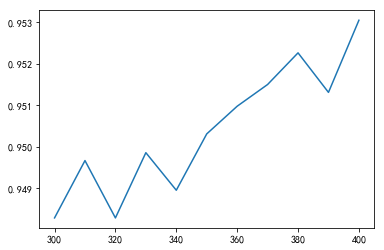

In [44]:
plt.plot(range(300, 400+1, 10), scores)
plt.show()

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

scores = []
for i in range(390, 500+1, 10):
    X_fschi = SelectKBest(chi2, k=i).fit_transform(X_fsvar, y)
    score = cross_val_score(RFC(n_estimators=20, random_state=1), X_fschi, y, cv=5).mean()
    scores.append(score)

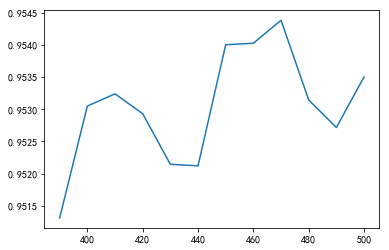

In [47]:
plt.plot(range(390, 500+1, 10), scores)  # 可以看到在470左右取到最大值
plt.show()

In [49]:
max(scores)

0.9543812394392164

>用卡方检验找出k值

>p值法的大概原理是：利用小概率事件不可能发生，如果我们认为小概率事件发生的概率正常为p，如果超过p，那么我们就可以认为这件事不是小概率了。

卡方检验的本质是推测两组数据之间的差异，其检验的原假设是”两组数据是相互独立的”（即，两组数据不相关）。卡方检验返回卡方值和
P值两个统计量，其中卡方值很难界定有效的范围，而p值，我们一般使用0.01或0.05作为显著性水平，即p值判断
的边界，具体我们可以这样来看：

![](images/3_8.png)

从特征工程的角度，我们希望选取卡方值很大，p值小于0.05的特征，即和标签是相关联的特征。而调用
SelectKBest之前，我们可以直接从chi2实例化后的模型中获得各个特征所对应的卡方值和P值

In [50]:
chi_values, chi_pvalues = chi2(X_fsvar, y) # 卡方检验会返回两个变量，一个是卡方分布的分布值，一个是P值

In [65]:
# 可以通过p过滤，
p = 0.05
(chi_pvalues > p).sum()

0

In [68]:
#k取多少？我们想要消除所有p值大于设定值，比如0.05或0.01的特征：
p = 0.05
k = chi_values.shape[0] - (chi_pvalues > p).sum()
#X_fschi = SelectKBest(chi2, k=填写具体的k).fit_transform(X_fsvar, y)
#cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()
k

708

>用F检验选择k值

F检验，又称ANOVA，方差齐性检验，是用来捕捉每个特征与标签之间的线性关系的过滤方法。它即可以做回归也
可以做分类，因此包含**feature_selection.f_classif**（F检验分类）和**feature_selection.f_regression**（F检验回
归）两个类。其中F检验分类用于标签是离散型变量的数据，而F检验回归用于标签是连续型变量的数据

和卡方检验一样，这两个类需要和类**SelectKBest**连用，并且我们也可以直接通过输出的统计量来判断我们到底要
设置一个什么样的K。需要注意的是，F检验在数据服从正态分布时效果会非常稳定，因此如果使用F检验过滤，我
们会先将数据转换成服从正态分布的方式

F检验的本质是寻找两组数据之间的线性关系，其原假设是”数据不存在显著的线性关系“。它返回F值和p值两个统
计量。和卡方过滤一样，**我们希望选取p值小于0.05或0.01的特征，这些特征与标签时显著线性相关的**，而p值大于
0.05或0.01的特征则被我们认为是和标签没有显著线性关系的特征，应该被删除。以F检验的分类为例，我们继续
在数字数据集上来进行特征选择

##### 小结
+ 卡方检验(一般检验特征与标签的关系)：用于检验两组数据是否相互独立(**原假设两组数据是相互独立的**)。  
卡方检验会返回一个chi_values和一个chi_pvalues。当chi_pvalues中values>p，（我们认为小概率事件发生的概率为p）我们就可以认为这两组数据是相互独立的。  
既然两组数据是相互独立(即，特征与标签是相互独立)，也就是他们是不相关的，那我们就不能用该特征预测标签。  
所以，我们可以用$特征的数量 - 线性不是相互独立的特征的数量 = k$
+ F检验(检验特征与标签的关系)：用于检验两组数据是否线性相关(**原假设两组数据不存在显著的线性关系**)  
F检验与卡方检验一样会返回一个F_values和一个F_pvalues。当F_pvalues中的values>p，我们就可以认为这两组数据是显著性相关的。所以我们需要过滤这些数据


In [70]:
from sklearn.feature_selection import f_classif

F_values, F_pvalues = f_classif(X_fsvar, y)

In [73]:
p = 0.05
(F_pvalues>p).sum()

48

In [83]:
p = 0.05
k = X_fsvar.shape[1] - (F_pvalues>p).sum()
X_fsf = SelectKBest(f_classif, k=k).fit_transform(X_fsvar, y)

In [85]:
score = cross_val_score(RFC(n_estimators=20, random_state=1), X_fsf, y, cv=5).mean()

In [89]:
"""虽然分数下降了，但下降的幅度不是很明显，我们可以在运行时间与准确度去平衡"""
print('只过滤方差为0的：{}， F检验后的:{}'.format(pre_score.mean(), score))

只过滤方差为0的：0.9537859105492401， F检验后的:0.9537625033693994


>使用互信息法选出k值

互信息法是用来捕捉每个特征与标签之间的任意关系（包括线性和非线性关系）的过滤方法。和F检验相似，它既
可以做回归也可以做分类，并且包含两个类**feature_selection.mutual_info_classif**（互信息分类）和
**feature_selection.mutual_info_regression**（互信息回归）。这两个类的用法和参数都和F检验一模一样，不过
互信息法比F检验更加强大，F检验只能够找出线性关系，而互信息法可以找出任意关系。  

互信息法不返回p值或F值类似的统计量，它返回“每个特征与目标之间的互信息量的估计”，这个估计量在[0,1]之间
取值，为0则表示两个变量独立，为1则表示两个变量完全相关。以互信息分类为例的代码如下

In [91]:
from sklearn.feature_selection import mutual_info_classif as MIC

result = MIC(X_fsvar, y)

In [96]:
k = X_fsvar.shape[1] - (result<=0).sum()
X_fsmic = SelectKBest(MIC, k=k).fit_transform(X_fsvar, y)

In [97]:
score = cross_val_score_val_score_val_score(RFC(n_estimators=20, random_state=1), X_fsmic, y, cv=5).mean()

In [101]:
print(pre_score.mean(), score)

0.9537859105492401 0.9527383252946129


当然了，无论是F检验还是互信息法，大家也都可以使用学习曲线，只是使用统计量的方法会更加高效。当统计量
判断已经没有特征可以删除时，无论用学习曲线如何跑，删除特征都只会降低模型的表现。当然了，如果数据量太
庞大，模型太复杂，我们还是可以牺牲模型表现来提升模型速度，一切都看大家的具体需求

#### 过滤法总结

到这里我们学习了常用的基于过滤法的特征选择，包括方差过滤，基于卡方，F检验和互信息的相关性过滤，讲解
了各个过滤的原理和面临的问题，以及怎样调这些过滤类的超参数。通常来说，我会建议，先使用方差过滤，然后
使用互信息法来捕捉相关性，不过了解各种各样的过滤方式也是必要的。所有信息被总结在下表：

![](images/3_9.png)

### Embedded嵌入法

嵌入法是一种让算法自己决定使用哪些特征的方法，即特征选择和算法训练同时进行。在使用嵌入法时，我们先使
用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据权值系数从大到小选择特征。这些权值系
数往往代表了特征对于模型的某种贡献或某种重要性，比如决策树和树的集成模型中的feature_importances_属
性，可以列出各个特征对树的建立的贡献，我们就可以基于这种贡献的评估，找出对模型建立最有用的特征。因此
相比于过滤法，嵌入法的结果会更加精确到模型的效用本身，对于提高模型效力有更好的效果。并且，由于考虑特
征对模型的贡献，因此无关的特征（需要相关性过滤的特征）和无区分度的特征（需要方差过滤的特征）都会因为
缺乏对模型的贡献而被删除掉，可谓是过滤法的进化版

![](images/3_10.png)

过滤法中使用的统计量可以使用统计知识和常识来查找范围（如p值应当低于显著性水平0.05），而嵌入法中使用
的权值系数却没有这样的范围可找——我们可以说，权值系数为0的特征对模型丝毫没有作用，但当大量特征都对
模型有贡献且贡献不一时，我们就很难去界定一个有效的临界值。这种情况下，模型权值系数就是我们的超参数，
我们或许需要学习曲线，或者根据模型本身的某些性质去判断这个超参数的最佳值究竟应该是多少。

另外，嵌入法引入了算法来挑选特征，因此其计算速度也会和应用的算法有很大的关系。如果采用计算量很大，计
算缓慢的算法，嵌入法本身也会非常耗时耗力。并且，在选择完毕之后，我们还是需要自己来评估模型。

SelectFromModel是一个元变换器，可以与任何在拟合后具有coef_，feature_importances_属性或参数中可选惩
罚项的评估器一起使用（比如随机森林和树模型就具有属性feature_importances_，逻辑回归就带有l1和l2惩罚
项，线性支持向量机也支持l2惩罚项）。  

对于有feature_importances_的模型来说，若重要性低于提供的阈值参数，则认为这些特征不重要并被移除。
feature_importances_的取值范围是[0,1]，如果设置阈值很小，比如0.001，就可以删除那些对标签预测完全没贡
献的特征。如果设置得很接近1，可能只有一两个特征能够被留下

>带有惩罚项的模型的嵌入法

对于带有惩罚项的模型来说，正则化的惩罚项越大，特征在模型中的系数就越小。当正则惩罚项越大(最大为1)时，特征在模型中的系数就越接近于0。

![](images/3_11.png)

In [4]:
from sklearn.feature_selection import SelectFromModel 
from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd


data = pd.read_csv('data/digit recognizor.csv')
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# 这里用方差过滤法
X_fsvar = VarianceThreshold(threshold=0).fit_transform(X)

In [7]:
rfc = RFC(n_estimators=10, random_state=1)
# 在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征
# 只能够分到大约0.001的feature_importances
x_embedded = SelectFromModel(rfc, threshold=0.005).fit_transform(X_fsvar, y)

In [9]:
x_embedded.shape

(42000, 49)

In [10]:
cross_val_score(rfc, x_embedded, y, cv=5).mean()

0.899524461464263

In [27]:
# 绘制学习曲线
rfc = RFC(n_estimators=10, random_state=1)
threshold = np.linspace(0, rfc.fit(X,y).feature_importances_.max(), 20)

In [28]:
scores = []
for i in threshold:
    X_embedded = SelectFromModel(rfc, threshold=i).fit_transform(X, y)
    score = cross_val_score(rfc, X_embedded, y, cv=5).mean()
    scores.append(score)

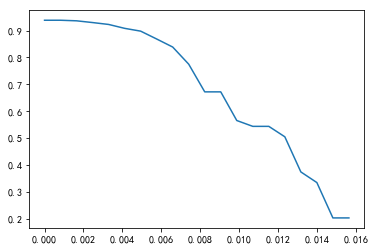

In [31]:
import matplotlib.pyplot as plt
plt.plot(threshold, scores)
plt.show()

从上面我们可以看出，随着阈值的增加，模型的效果越来越差。阈值在0-0.002已经很好了，但是此时过滤的特征确是很少，说明原始数据的特征都对模型有很大影响。不过我们可以牺牲一点模型的准确度，降低特征的数量，从而使模型跑的更快。

In [32]:
"""使用阈值为0.001看看过滤后的特征数量"""
X_embedded = SelectFromModel(rfc, threshold=0.001).fit_transform(X, y)

In [34]:
X_embedded.shape

(42000, 282)

In [35]:
score = cross_val_score(rfc, X_embedded, y, cv=5).mean()

In [36]:
"""与没过滤之前的做对比"""
pre_score = cross_val_score(rfc, X, y, cv=5).mean()

In [37]:
print(pre_score, score)

0.9381432010052206 0.9366670499328583


In [38]:
"""寻找更好的阈值"""
pieces = 15
scores = []
for i in np.linspace(0, 0.002, pieces):
    X_embedded = SelectFromModel(rfc, threshold=i).fit_transform(X, y)
    score = cross_val_score(rfc, X_embedded, y, cv=5)
    scores.append(score.mean())

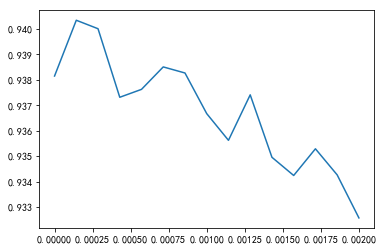

In [39]:
plt.plot(np.linspace(0, 0.002, pieces), scores)
plt.show()

In [40]:
"""再一次更正模型"""
X_embedded = SelectFromModel(rfc, threshold=0.00125).fit_transform(X, y)

In [41]:
X_embedded.shape

(42000, 249)

In [42]:
"""
这里嵌入法的阈值为0.00125过滤的特征比之前的还多(threshold=0.001)，
但模型的评分却比前面还高，说明其中含有一些噪音。
"""
cross_val_score(rfc, X_embedded, y, cv=5).mean()

0.9374765994297645

In [46]:
# 使用更精确的随机森林模型
cross_val_score(RFC(n_estimators=100, random_state=1), X_embedded, y, cv=5).mean()

0.9610005206702571

### Wrapper包装法

包装法也是一个**特征选择和算法训练**同时进行的方法，与嵌入法十分相似，它也是依赖于算法自身的选择，比如
coef_属性或feature_importances_属性来完成特征选择。

但不同的是，我们往往使用一个目标函数作为黑盒来帮
助我们选取特征，而不是自己输入某个评估指标或统计量的阈值。包装法在初始特征集上训练评估器，并且通过
coef_属性或通过feature_importances_属性获得每个特征的重要性。然后，从当前的一组特征中修剪最不重要的
特征。在修剪的集合上**递归地重复该过程**，直到最终到达所需数量的要选择的特征。区别于过滤法和嵌入法的一次
训练解决所有问题，包装法要使用特征子集进行多次训练，因此它所需要的计算成本是最高的。

![](images/3_12.png)

这里的算法指的时数据挖掘时的算法(即，目标函数)。最典型的目标函数是递归特征消去法(Recursive feature elimination, 简写为RFE)。这是一种贪婪的优化算法，它会反复创建模型， 并在每次迭代中剔除那些表现最差的特征，选出那些表现最好的特征。然后从上一次没选到的特征中构建模型，如此往复，直到所有的特征都筛选完毕(可见，这种算法是成效明显，但计算量要比嵌入法和过滤法多得多)。  

最后，会根据所选的特征进行排名，选出最佳子集。包装法的效果是所有特征选择方法中最利于提升模型
表现的，它可以使用很少的特征达到很优秀的效果。除此之外，在特征数目相同时，包装法和嵌入法的效果能够匹
敌，不过它比嵌入法算得更见缓慢，所以也不适用于太大型的数据。相比之下，包装法是最能保证模型效果的特征
选择方法

参数**estimator**是需要填写的实例化后的评估器，**n_features_to_select**是想要选择的特征个数，**step**表示每次迭
代中希望移除的特征个数。除此之外，RFE类有两个很重要的属性，**.support_**：返回所有的特征的是否最后被选
中的布尔矩阵，以及**.ranking_**返回特征的按数次迭代中综合重要性的排名。类feature_selection.RFECV会在交叉
验证循环中执行RFE以找到最佳数量的特征，增加参数cv，其他用法都和RFE一模一样

In [48]:
from sklearn.feature_selection import RFE

In [50]:
rfc = RFC(n_estimators=10, random_state=1)
rfe = RFE(rfc, n_features_to_select=300, step=50).fit(X, y)

In [56]:
rfe.support_.sum()

300

In [62]:
rfe.ranking_

array([11, 10,  9,  8,  7,  7,  7,  7,  7,  7,  7,  8,  7,  7,  8,  7,  7,
        7,  7,  8,  7,  7,  7,  8,  7,  7,  7,  8,  8,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  7,  8,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  7,  7,  8,  5,  5,
        5,  4,  4,  5,  5,  5,  5,  6,  6,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  7,  9,  7,  6,  5,  4,  1,  3,  1,  1,  1,  1,  1,
        1,  3,  4,  6,  5,  5,  7,  9,  9,  9, 10, 10, 10, 10,  9,  6,  6,
        4,  3,  4,  1,  1,  1,  1,  1,  1,  1,  3,  1,  2,  3,  4,  5,  5,
        5, 10, 10, 10, 11, 11, 11, 11, 11, 11,  4,  4,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  3,  2,  4,  5,  6, 10, 11, 11, 11,
       10, 10,  5,  4,  4,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  8, 10, 11, 11, 11, 11,  5,  5,  4,  3,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,
        6,  7, 11, 11, 11

In [55]:
X_wrapper = rfe.transform(X)

In [63]:
cross_val_score(rfc, X_wrapper, y, cv=5).mean()

0.9384047458885167

In [64]:
# 对包装法绘制学习曲线
scores = []
for i in range(1, X.shape[1]+1, 50):
    X_wrapper = RFE(rfc, n_features_to_select=i, step=50).fit_transform(X, y)
    score = cross_val_score(rfc, X_wrapper, y, cv=5).mean()
    scores.append(score)

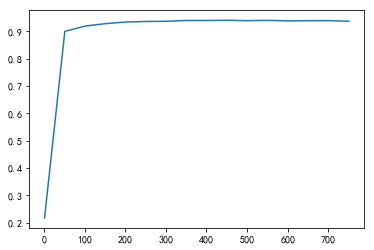

In [65]:
plt.plot(range(1, X.shape[1]+1, 50), scores)
plt.show()

由上图可以看出，模型在第一次过滤时就已经很好了，后面的效果不会很明显。

In [67]:
X_wrapper = RFE(rfc, n_features_to_select=200, step=50).fit_transform(X, y)

In [68]:
cross_val_score(rfc, X_wrapper, y, cv=5).mean()

0.9337380105246142

In [69]:
cross_val_score(RFC(n_estimators=100, random_state=1), X_wrapper, y, cv=5).mean()

0.9578335813015357

## 小结

在特征过滤算法中，  
过滤法的速度最快，但效果最粗糙。  
嵌入法和包装法更精确，具体到每个模型，但开销也由模型的复杂度增加而增加。  
优先使用过滤法，简单地过滤一些没有用的特征，再进一步考虑嵌入法和包装法。  
当数据量很大的时候，优先使用方差过滤和互信息法调整，再上其他特
征选择方法。使用逻辑回归时，优先使用嵌入法。使用支持向量机时，优先使用包装法。迷茫的时候，从过滤法走
起，看具体数据具体分析